In [0]:
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Reshape, concatenate
from tensorflow.keras.layers import BatchNormalization, RepeatVector, Permute
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.layers import MaxPooling2D, Input, Dense, Flatten
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec

**Load the Images**

In [4]:
def fetch_images(name, size):
    x_images = []
    y_images = []
    for file in (os.listdir(name)):
        image = Image.open(name+file)
        # print (name+file)
        x_image = image.resize((size[0]//2, size[1]//2))
        x_image = x_image.resize(size, Image.NEAREST)
        x_image = np.array(x_image)
        y_image = image.resize(size)
        y_image = np.array(y_image)
        x_images.append(x_image)
        y_images.append(y_image)
    x_images = np.array(x_images)
    y_images = np.array(y_images)
    x_images = x_images / 255
    y_images = y_images / 255
    return x_images, y_images
ximages, yimages = fetch_images("Train/", (128,128))

400
800
1200
1600


In [5]:
input = Input(shape=(128,128, 3))
c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input)
c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)

level1_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
level1_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
level1_3 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)

concatenated = concatenate([level1_1, level1_2,level1_3],axis=3)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same')(concatenated)
out = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(c3)

model = Model(inputs=input, outputs=out)

print (model.summary())

<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x7f6f86951e48>>


In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 6,
                              verbose = 1,
                              min_delta = 0.0001)

filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(ximages, yimages,validation_split=0.2 , epochs=500, batch_size=4, callbacks = [checkpoint,reduce_lr])

Epoch 1/500
398/400 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.8129
Epoch 00001: val_loss improved from inf to 0.00135, saving model to weights.hdf5
400/400 [==============================] - 10s 26ms/step - loss: 0.0021 - accuracy: 0.8131 - val_loss: 0.0014 - val_accuracy: 0.8703 - lr: 0.0010
Epoch 2/500
398/400 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.8339
Epoch 00002: val_loss improved from 0.00135 to 0.00134, saving model to weights.hdf5
400/400 [==============================] - 10s 26ms/step - loss: 0.0018 - accuracy: 0.8339 - val_loss: 0.0013 - val_accuracy: 0.8568 - lr: 0.0010
Epoch 3/500
400/400 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.8468
Epoch 00003: val_loss did not improve from 0.00134
400/400 [==============================] - 10s 25ms/step - loss: 0.0016 - accuracy: 0.8468 - val_loss: 0.0017 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 4/500
398/400 [============================>.] -

KeyboardInterrupt: ignored

In [0]:
def load_testimage(name, size):
  x_images = []
  for file in (os.listdir(name)):
      image = Image.open(name + file)
      image = image.resize((size[0]//2, size[1]//2))
      image = image.resize(size, Image.NEAREST)
      image = np.array(image,dtype=float)
      image = image / 255
      image = np.array([image])
      x_images.append(image) 
  return x_images
testimages = load_testimage("Test/", (128,128))

Here the input blurred image

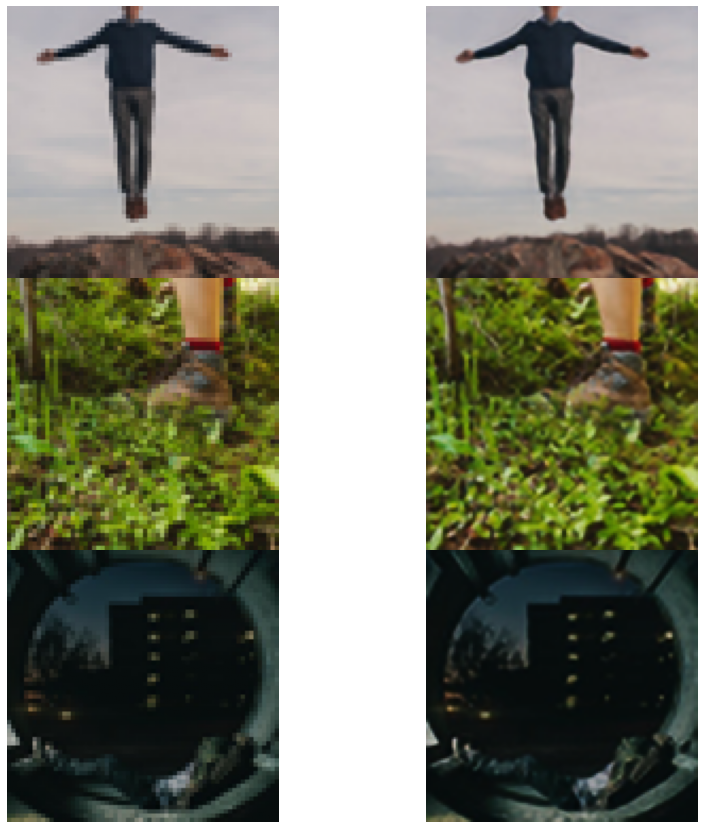

In [14]:
model.load_weights('weights.hdf5')

f, ax = plt.subplots(3,2, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},squeeze=True)
plt.subplots_adjust(wspace=None, hspace=None)
f.set_figheight(15)
f.set_figwidth(15)
c = 0
j = 0
for i in range(3):  
  prediction = model.predict(testimages[c])
  prediction = prediction[0] * 255
  prediction = prediction.astype(np.uint8)
  prediction = Image.fromarray(prediction)
  ax[i][j].axis("off")
  ax[i][j].imshow(testimages[c].reshape(128,128,3))
  ax[i][j+1].axis("off")
  ax[i][j+1].imshow(prediction)
  c = c + 1